   Project_ID  Building_Height  Material_Quality_Index  Labor_Cost  \
0           1        21.854305                       9   70.213332   
1           2        47.782144                       9  142.413614   
2           3        37.939727                       3  110.539985   
3           4        31.939632                       6  250.784939   
4           5        12.020839                       7  167.575159   

   Concrete_Strength  Foundation_Depth  Weather_Index  Construction_Cost  
0          45.326394          8.804790              4        2400.287931  
1          47.900505          6.727632              6        3705.461312  
2          22.112484          8.208544              8        2653.631004  
3          26.267562          7.094515              4        2534.099466  
4          40.134306          6.160303              6        1741.179333  

Missing Values:
 Project_ID                0
Building_Height           0
Material_Quality_Index    0
Labor_Cost                0

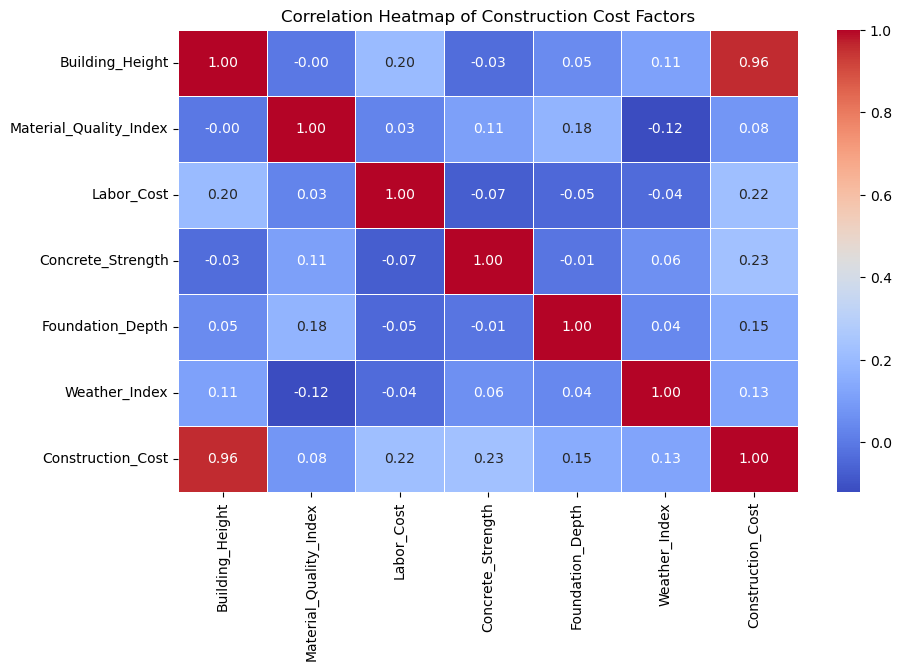

In [2]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/Users/kruthikasaisree/Downloads/Civil_Engineering_Regression_Dataset.csv"  # Update path if needed
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

# Identify independent and dependent variables
independent_vars = df.columns.difference(["Construction_Cost", "Project_ID"]).tolist()
dependent_var = "Construction_Cost"

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)

# Generate summary statistics
summary_stats = df.describe().T  # Transpose for better readability
summary_stats = summary_stats[['mean', '50%', 'std']].rename(columns={'50%': 'median'})
print("\nSummary Statistics:\n", summary_stats)

# Compute correlation matrix
corr_matrix = df.drop(columns=["Project_ID"]).corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Construction Cost Factors")
plt.show()


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define independent (X) and dependent (Y) variables
X = df[['Building_Height']]  # Independent variable
y = df['Construction_Cost']  # Dependent variable

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get regression coefficients
slope = model.coef_[0]  # Coefficient (m)
intercept = model.intercept_  # Intercept (b)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

(slope, intercept, r2, mse)


(49.672752408267044, 992.1885574140758, 0.9251224612323216, 42990.64782261946)

In [8]:
# Define independent (X) and dependent (Y) variables for multiple regression
X_multi = df[['Building_Height', 'Material_Quality_Index', 'Labor_Cost', 'Concrete_Strength', 'Foundation_Depth']]
y_multi = df['Construction_Cost']

# Split data into training and testing sets (80% train, 20% test)
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Initialize and fit the multiple linear regression model
multi_model = LinearRegression()
multi_model.fit(X_train_multi, y_train_multi)

# Get regression coefficients
coefficients = multi_model.coef_
intercept_multi = multi_model.intercept_

# Create a dictionary of variable names and their coefficients
coef_dict = dict(zip(X_multi.columns, coefficients))

# Identify the variable with the highest absolute impact
most_impactful_var = max(coef_dict, key=lambda k: abs(coef_dict[k]))

(coef_dict, intercept_multi, most_impactful_var)


({'Building_Height': 49.81132446197607,
  'Material_Quality_Index': 10.329643633921718,
  'Labor_Cost': 0.5263638589028652,
  'Concrete_Strength': 20.20240865781868,
  'Foundation_Depth': 30.13595831298436},
 -9.639678668440865,
 'Building_Height')

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Define independent (X) and dependent (Y) variables
X_multi = df[['Building_Height', 'Material_Quality_Index', 'Labor_Cost', 'Concrete_Strength', 'Foundation_Depth']]
y_multi = df['Construction_Cost']

# Split data into training and testing sets (80% train, 20% test)
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Initialize and fit the multiple linear regression model
multi_model = LinearRegression()
multi_model.fit(X_train_multi, y_train_multi)

# Make predictions
y_pred_multi = multi_model.predict(X_test_multi)

# Compute R-squared
r2_multi = r2_score(y_test_multi, y_pred_multi)

# Compute Adjusted R-squared
n = X_test_multi.shape[0]  # Number of observations
p = X_test_multi.shape[1]  # Number of predictors
adjusted_r2_multi = 1 - (1 - r2_multi) * (n - 1) / (n - p - 1)

# Compute VIF for each predictor
vif_data = pd.DataFrame()
vif_data["Feature"] = X_multi.columns
vif_data["VIF"] = [variance_inflation_factor(X_multi.values, i) for i in range(X_multi.shape[1])]

# Compare R-squared values
comparison_results = {
    "Simple Linear Regression R^2": r2,
    "Multiple Linear Regression R^2": r2_multi,
    "Adjusted R^2 (Multiple)": adjusted_r2_multi,
    "VIF Scores": vif_data
}

comparison_results


{'Simple Linear Regression R^2': 0.9251224612323216,
 'Multiple Linear Regression R^2': 0.9998023074199777,
 'Adjusted R^2 (Multiple)': 0.9997317029271126,
 'VIF Scores':                   Feature       VIF
 0         Building_Height  4.808162
 1  Material_Quality_Index  8.837148
 2              Labor_Cost  7.128474
 3       Concrete_Strength  9.242819
 4        Foundation_Depth  6.072498}